# Pandas

## DataFrames and Series

The two basic elements of pandas are DataFrames and Series. DataFrames are similar to tables where both the column and rows can have names (in other words, you can have custom indexing with DataFrames). A Series is a column of a DataFrame.

Let us initialize a pandas DataFrame:

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
ordinary_names = ['Luke Skywalker', 'Han Solo', 'Leia (Skywalker) Organa',
                 'Lando Calrissian', 'Darth Vader', 'Emperor Palpatine', 'Jar Jar Binks']
random_numbers = [7, 10, 5, 7, 10, 4, -999999]
just_a_list    = [999, 0, 10, 0, 999, 999, 0]
boolean_list   = [False, False, False, False, False, False, True]
another_list   = [4.2, 4.5, 5.1, 2.5, 6.5, 6.0, 'too many']
data = { 'name'            : ordinary_names,
        'coolness'        : random_numbers,
        'force-stuff'     : just_a_list,
        'abomination'     : boolean_list,
        "shouldn't-exist" : boolean_list,
        'N_movies'        : another_list
      }

Star = pd.DataFrame(data)
Star

,name,coolness,force-stuff,abomination,shouldn't-exist,N_movies
0,Luke Skywalker,7,999,False,False,4.2
1,Han Solo,10,0,False,False,4.5
2,Leia (Skywalker) Organa,5,10,False,False,5.1
3,Lando Calrissian,7,0,False,False,2.5
4,Darth Vader,10,999,False,False,6.5
5,Emperor Palpatine,4,999,False,False,6
6,Jar Jar Binks,-999999,0,True,True,too many


When creating a DataFrame we can also specify a row index to use, if we do not want to use the regular numbering index scheme

In [2]:
Star = Star.set_index('name')
Star

,coolness,force-stuff,abomination,shouldn't-exist,N_movies
name,,,,,
Luke Skywalker,7,999,False,False,4.2
Han Solo,10,0,False,False,4.5
Leia (Skywalker) Organa,5,10,False,False,5.1
Lando Calrissian,7,0,False,False,2.5
Darth Vader,10,999,False,False,6.5
Emperor Palpatine,4,999,False,False,6
Jar Jar Binks,-999999,0,True,True,too many


To add a new column all that is needed to be done is DataFrame['new_column_name'] = new_column_values. We just need to make sure that the number of entries in the passed column values is the same as the number of rows in the DataFrame.

In [3]:
Badassery = [15, 20, 10, 10, 999, 2, np.NaN]
Star['Badassery'] = Badassery
Star

,coolness,force-stuff,abomination,shouldn't-exist,N_movies,Badassery
name,,,,,,
Luke Skywalker,7,999,False,False,4.2,15.0
Han Solo,10,0,False,False,4.5,20.0
Leia (Skywalker) Organa,5,10,False,False,5.1,10.0
Lando Calrissian,7,0,False,False,2.5,10.0
Darth Vader,10,999,False,False,6.5,999.0
Emperor Palpatine,4,999,False,False,6,2.0
Jar Jar Binks,-999999,0,True,True,too many,NaN


By doing the .info() command we can get information on the DataFrame. We get information on the data type of each column and the number of non-null values in the each column and the memory used by the DataFrame.

In [4]:
Star.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Luke Skywalker to Jar Jar Binks
Data columns (total 6 columns):
coolness           7 non-null int64
force-stuff        7 non-null int64
abomination        7 non-null bool
shouldn't-exist    7 non-null bool
N_movies           7 non-null object
Badassery          6 non-null float64
dtypes: bool(2), float64(1), int64(2), object(1)
memory usage: 294.0+ bytes


If you have a null value, you can deal with it in 2 ways:
 - Remove the entire row that contains a null value
 - Replace the null value with a non-null value (imputation)

To drop the whole row you need to do:

In [5]:
Star.dropna()

,coolness,force-stuff,abomination,shouldn't-exist,N_movies,Badassery
name,,,,,,
Luke Skywalker,7,999,False,False,4.2,15.0
Han Solo,10,0,False,False,4.5,20.0
Leia (Skywalker) Organa,5,10,False,False,5.1,10.0
Lando Calrissian,7,0,False,False,2.5,10.0
Darth Vader,10,999,False,False,6.5,999.0
Emperor Palpatine,4,999,False,False,6,2.0


If instead you wanted to replace it with another value, you would do:

In [6]:
Star.fillna(0)

,coolness,force-stuff,abomination,shouldn't-exist,N_movies,Badassery
name,,,,,,
Luke Skywalker,7,999,False,False,4.2,15.0
Han Solo,10,0,False,False,4.5,20.0
Leia (Skywalker) Organa,5,10,False,False,5.1,10.0
Lando Calrissian,7,0,False,False,2.5,10.0
Darth Vader,10,999,False,False,6.5,999.0
Emperor Palpatine,4,999,False,False,6,2.0
Jar Jar Binks,-999999,0,True,True,too many,0.0


There are various ways to do fill the null values, looking at the documentation for the fillna function would be useful to see the other ways to use it.

## Indexing

In a pandas DataFrame, we cannot use the standard indexing search to find values. First, the standard indexing looks first at columns and then at rows. When looking at indices, we must use the names of columns and rows instead of their position.

In [7]:
Star['coolness']

name
Luke Skywalker                  7
Han Solo                       10
Leia (Skywalker) Organa         5
Lando Calrissian                7
Darth Vader                    10
Emperor Palpatine               4
Jar Jar Binks             -999999
Name: coolness, dtype: int64

In [8]:
Star['coolness'][0]

7

In [9]:
Star['coolness']['Han Solo']

10

In [10]:
Star[['coolness', 'force-stuff']]

,coolness,force-stuff
name,,
Luke Skywalker,7,999
Han Solo,10,0
Leia (Skywalker) Organa,5,10
Lando Calrissian,7,0
Darth Vader,10,999
Emperor Palpatine,4,999
Jar Jar Binks,-999999,0


If we want to use indexing the same way as we do for numpy then we need to follow the dataframe call by .iloc, then the indexing is same as for a 2-D numpy array. If we use .loc instead, we need to use the names of the columns and rows.

In [11]:
Star.iloc[0]

coolness               7
force-stuff          999
abomination        False
shouldn't-exist    False
N_movies             4.2
Badassery             15
Name: Luke Skywalker, dtype: object

In [12]:
Star.iloc[0:3]

,coolness,force-stuff,abomination,shouldn't-exist,N_movies,Badassery
name,,,,,,
Luke Skywalker,7,999,False,False,4.2,15.0
Han Solo,10,0,False,False,4.5,20.0
Leia (Skywalker) Organa,5,10,False,False,5.1,10.0


In [13]:
Star.iloc[0:3, 3:6]

,shouldn't-exist,N_movies,Badassery
name,,,
Luke Skywalker,False,4.2,15.0
Han Solo,False,4.5,20.0
Leia (Skywalker) Organa,False,5.1,10.0


In [14]:
Star.loc['Luke Skywalker']

coolness               7
force-stuff          999
abomination        False
shouldn't-exist    False
N_movies             4.2
Badassery             15
Name: Luke Skywalker, dtype: object

In [15]:
Star.loc['Luke Skywalker':'Leia (Skywalker) Organa']

,coolness,force-stuff,abomination,shouldn't-exist,N_movies,Badassery
name,,,,,,
Luke Skywalker,7,999,False,False,4.2,15.0
Han Solo,10,0,False,False,4.5,20.0
Leia (Skywalker) Organa,5,10,False,False,5.1,10.0


In [16]:
Star.loc['Luke Skywalker':'Leia (Skywalker) Organa', "shouldn't-exist":"Badassery"]

,shouldn't-exist,N_movies,Badassery
name,,,
Luke Skywalker,False,4.2,15.0
Han Solo,False,4.5,20.0
Leia (Skywalker) Organa,False,5.1,10.0


## Reading from files

It is simple to read from files with pandas, you just need to call the read_*file_extension*(filename, *other arguments*). There are usually a lot of othe arguments, so going to the docs of the needed read function is better then writing them all down here.

In [46]:
ramen = pd.read_csv("ramen-ratings2.csv")

In [47]:
ramen

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
5,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,NaN
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4.00,NaN
7,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,NaN
8,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,NaN
9,2571,KOKA,The Original Spicy Stir-Fried Noodles,Pack,Singapore,2.50,NaN


There are a lot of different arguments that can be added in the function call, for a deeper understanding look at the documentation for the reading function you are considering using. Writing is as easy, instead of typing read, you should type to, and you call it directly from the DataFrame you want to write and you can write to a file.

If you wanted to see only the first values of the DataFrame, you can use the .head(n) function, where n is the number of rows of the DataFrame you want to see (by default 5). If you want to see the last entries, then it is .tail(n).

In [48]:
ramen.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [49]:
ramen.head(11)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1.00,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN
5,2575,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,4.75,NaN
6,2574,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,4.00,NaN
7,2573,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,3.75,NaN
8,2572,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,0.25,NaN
9,2571,KOKA,The Original Spicy Stir-Fried Noodles,Pack,Singapore,2.50,NaN


In [50]:
ramen.tail()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
2572,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2573,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,NaN
2574,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,NaN
2575,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,NaN
2576,1,Westbrae,Miso Ramen,Pack,USA,0.5,NaN


In [51]:
ramen.tail(7)

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
2570,7,Ve Wong,Mushroom Pork,Pack,Vietnam,1.0,NaN
2571,6,Vifon,Nam Vang,Pack,Vietnam,2.5,NaN
2572,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,NaN
2573,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,NaN
2574,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,NaN
2575,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,NaN
2576,1,Westbrae,Miso Ramen,Pack,USA,0.5,NaN


## Plotting, Grouping and Statistics

### Statistics

In pandas, you can use the same function as for numpy to calculate statics of the whole DataFrame or for a specific column

In [66]:
ramen.mean()

Review #    1289.443927
Stars          3.654676
dtype: float64

In [67]:
ramen.max()

Review #                                            2580
Brand                                            iNoodle
Variety     三養라면 (Samyang Ramyun) (South Korean Version)
Country                                          Vietnam
Stars                                                  5
dtype: object

In [68]:
ramen.min()

Review #                                1
Brand                      1 To 3 Noodles
Variety     "A" Series Artificial Chicken
Country                         Australia
Stars                                   0
dtype: object

In [69]:
ramen.std()

Review #    744.569010
Stars         1.015331
dtype: float64

You can also you the .describe() function to give you all the basic statistics of each column of the DataFrame. This will also work for categorical values, if all the columns passed are categorical

In [52]:
ramen.describe()

,Review #,Stars
count,2577.000000,2577.000000
mean,1289.443927,3.654676
std,744.569010,1.015331
min,1.000000,0.000000
25%,645.000000,3.250000
50%,1289.000000,3.750000
75%,1934.000000,4.250000
max,2580.000000,5.000000


In [63]:
ramen_cat = ramen.loc[:, ~ramen.columns.isin(['Stars', 'Review #'])]
ramen_cat

,Brand,Variety,Style,Country,Top Ten
0,New Touch,T's Restaurant Tantanmen,Cup,Japan,NaN
1,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,NaN
2,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,NaN
3,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,NaN
4,Ching's Secret,Singapore Curry,Pack,India,NaN
5,Samyang Foods,Kimchi song Song Ramen,Pack,South Korea,NaN
6,Acecook,Spice Deli Tantan Men With Cilantro,Cup,Japan,NaN
7,Ikeda Shoku,Nabeyaki Kitsune Udon,Tray,Japan,NaN
8,Ripe'n'Dry,Hokkaido Soy Sauce Ramen,Pack,Japan,NaN
9,KOKA,The Original Spicy Stir-Fried Noodles,Pack,Singapore,NaN


In [65]:
ramen_cat.describe()

,Brand,Variety,Style,Country,Top Ten
count,2577,2577,2575,2577,41
unique,355,2410,7,38,38
top,Nissin,Beef,Pack,Japan,\r\r\n
freq,381,7,1528,352,4


### Grouping and Stacking

We can look at statistics of specific groups by using the groupby command (much like in SQL).

In [77]:
ramen.loc[:, ramen.columns != 'Review #'].groupby('Brand').mean().head()

,Stars
Brand,
1 To 3 Noodles,4.000000
7 Select,3.750000
7 Select/Nissin,3.500000
A-One,2.750000
A-Sha Dry Noodle,4.067308


In [79]:
ramen.loc[:, ramen.columns != 'Review #'].groupby('Country').mean()

,Stars
Country,
Australia,3.138636
Bangladesh,3.714286
Brazil,4.350000
Cambodia,4.200000
Canada,2.243902
China,3.421893
Colombia,3.291667
Dubai,3.583333
Estonia,3.500000


In [82]:
ramen.loc[:, ramen.columns != 'Review #'].groupby('Style').mean()

,Stars
Style,
Bar,5.000000
Bowl,3.670686
Box,4.291667
Can,3.500000
Cup,3.498500
Pack,3.700458
Tray,3.545139


In [83]:
ramen.loc[:, ramen.columns != 'Review #'].groupby('Style').count()

,Brand,Variety,Country,Stars,Top Ten
Style,,,,,
Bar,1,1,1,1,0
Bowl,481,481,481,481,1
Box,6,6,6,6,0
Can,1,1,1,1,0
Cup,450,450,450,450,1
Pack,1528,1528,1528,1528,35
Tray,108,108,108,108,4


In [86]:
ramen.loc[:, ramen.columns != 'Review #'].groupby('Style').describe()

Stars                                                  
        count      mean       std  min     25%   50%   75%  max
Style                                                          
Bar       1.0  5.000000       NaN  5.0  5.0000  5.00  5.00  5.0
Bowl    481.0  3.670686  1.062804  0.0  3.2500  3.75  4.50  5.0
Box       6.0  4.291667  1.400149  1.5  4.4375  5.00  5.00  5.0
Can       1.0  3.500000       NaN  3.5  3.5000  3.50  3.50  3.5
Cup     450.0  3.498500  1.032921  0.0  3.0000  3.50  4.00  5.0
Pack   1528.0  3.700458  0.982831  0.0  3.2500  3.75  4.25  5.0
Tray    108.0  3.545139  1.098993  0.0  3.0000  3.75  4.25  5.0

We can stack columns to give a hierachical design to our table.

In [105]:
pd.pivot_table(ramen, index = 'Country', columns = ['Style'], values = ['Variety'], aggfunc=np.count_nonzero)

Variety                                    
Style             Bar   Bowl  Box  Can   Cup   Pack  Tray
Country                                                  
Australia         NaN    NaN  NaN  NaN  17.0    5.0   NaN
Bangladesh        NaN    NaN  NaN  NaN   NaN    7.0   NaN
Brazil            NaN    NaN  NaN  NaN   2.0    3.0   NaN
Cambodia          NaN    NaN  NaN  NaN   NaN    5.0   NaN
Canada            NaN    8.0  NaN  NaN  17.0   16.0   NaN
China             NaN   45.0  NaN  NaN  16.0   98.0   9.0
Colombia          NaN    NaN  NaN  NaN   3.0    3.0   NaN
Dubai             NaN    NaN  NaN  NaN   NaN    3.0   NaN
Estonia           NaN    NaN  NaN  NaN   NaN    2.0   NaN
Fiji              NaN    NaN  NaN  NaN   NaN    4.0   NaN
Finland           NaN    NaN  NaN  NaN   NaN    3.0   NaN
Germany           NaN    NaN  NaN  NaN  11.0   16.0   NaN
Ghana             NaN    NaN  NaN  NaN   NaN    2.0   NaN
Holland           NaN    NaN  NaN  NaN   NaN    4.0   NaN
Hong Kong         NaN   30.0  NaN  NaN  38.0   67.0   2.0
Hungary           NaN    NaN  NaN  NaN   NaN    9.0   NaN
India             NaN    NaN  NaN  NaN   3.0   28.0   NaN
Indonesia         NaN    NaN  1.0  NaN  21.0  104.0   NaN
Japan             NaN  126.0  2.0  NaN  49.0  155.0  20.0
Malaysia          NaN    8.0  2.0  NaN  21.0  124.0   NaN
Mexico            NaN    NaN  NaN  NaN  15.0   10.0   NaN
Myanmar           NaN    NaN  NaN  NaN   3.0   11.0   NaN
Nepal             NaN    NaN  NaN  NaN   NaN   14.0   NaN
Netherlands       NaN    NaN  NaN  NaN   3.0   12.0   NaN
Nigeria           NaN    NaN  NaN  NaN   NaN    1.0   NaN
Pakistan          NaN    NaN  NaN  NaN   NaN    9.0   NaN
Philippines       NaN   10.0  NaN  NaN   4.0   33.0   NaN
Poland            NaN    NaN  NaN  NaN   NaN    4.0   NaN
Sarawak           NaN    NaN  NaN  NaN   NaN    3.0   NaN
Singapore         NaN   13.0  NaN  NaN  27.0   69.0   NaN
South Korea       NaN   68.0  NaN  NaN  40.0  181.0  18.0
Sweden            NaN    NaN  NaN  NaN   NaN    3.0   NaN
Taiwan            NaN   37.0  NaN  NaN   2.0  181.0   3.0
Thailand          NaN   44.0  NaN  NaN  48.0   97.0   2.0
UK                NaN    2.0  NaN  NaN  32.0   35.0   NaN
USA               1.0   70.0  1.0  1.0  70.0  128.0  52.0
United States     NaN    NaN  NaN  NaN   NaN    1.0   NaN
Vietnam           NaN   20.0  NaN  NaN   8.0   78.0   2.0

For more information on the pivot_table function, I would suggest looking at the documentation for the function

### Plotting

To plot a data from a DataFrame, we just need to call the .plot function and then choose what type of plot to do.

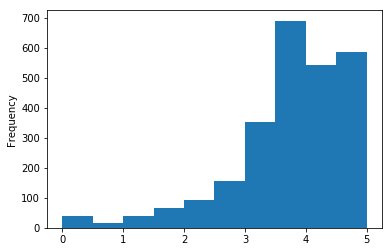

In [112]:
ramen.Stars.plot(kind='hist')

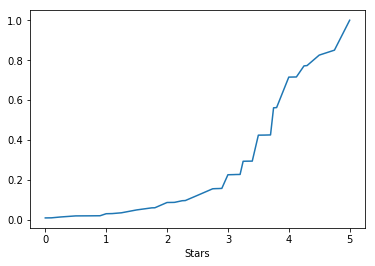

In [126]:
(ramen.groupby('Stars').count()['Review #'].cumsum() / 2577).plot()

# References

 1. Rater, Ramen. “THE BIG LIST.” The Ramen Rater, www.theramenrater.com/resources-2/the-list/.
 2. “Your Home for Data Science.” Kaggle, www.kaggle.com/.
 3. McIntire, George, et al. “Python Pandas Tutorial: A Complete Introduction for Beginners.” Learn Data Science - Tutorials, Books, Courses, and More, www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/.
 4. Hjorth-Jensen, Morten. https://compphysics.github.io/MachineLearningMSU/doc/pub/Introduction/html/Introduction.html